### Step 1: Create A Data Loader - for train and test

In [5]:
import os
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Collect image paths and metadata into a DataFrame
def collect_image_paths(root_dir):
    data = []
    
    # Walk through each directory
    for class_folder in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_folder)
        print(class_path)
        if os.path.isdir(class_path):
            for split in ['Train', 'Test']:
                split_path = os.path.join(class_path, split)
                
                if os.path.isdir(split_path):
                    for image_name in os.listdir(split_path):
                        image_path = os.path.join(split_path, image_name)
                        data.append({
                            'path': image_path,
                            'target': class_folder,
                            'split': split
                        })
    
    return data

# Set the root directory of your dataset
root_dir = 'C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Break Classification1'

# Collect the data
data = collect_image_paths(root_dir)

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Break Classification1\Avulsion fracture
C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Break Classification1\Comminuted fracture
C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Break Classification1\Fracture Dislocation
C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Break Classification1\Greenstick fracture
C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Break Classification1\Hairline Fracture
C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Break Classification1\Impacted fracture
C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Break Classification1\Longitudinal fracture
C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Break Classification1\Oblique fracture
C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Break Classification1\Pathological fracture
C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Break Classification1\Spiral Fracture
                                                path             target  split
0  C:/Users/Microsoft/Desktop/Ahmad Tariq/Bone Br...  Avulsion fractu

In [4]:
df.split.value_counts()

split
Train    989
Test     140
Name: count, dtype: int64

In [5]:
df.target.value_counts()

target
Fracture Dislocation     156
Comminuted fracture      148
Pathological fracture    134
Avulsion fracture        123
Greenstick fracture      122
Hairline Fracture        111
Spiral Fracture           86
Oblique fracture          85
Impacted fracture         84
Longitudinal fracture     80
Name: count, dtype: int64

In [6]:
# Define parameters
batch_size = 10
img_height = 256  # Change as needed
img_width = 256   # Change as needed

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
)

# Create data loaders
train_generator = datagen.flow_from_dataframe(
    dataframe=df[df['split'] == 'Train'],
    x_col='path',
    y_col='target',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # For multi-class classification
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df[df['split'] == 'Test'],
    x_col='path',
    y_col='target',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # For multi-class classification
)

# Verify the data loaders
print(f'Train samples: {train_generator.samples}')
print(f'Validation samples: {validation_generator.samples}')

Found 989 validated image filenames belonging to 10 classes.
Found 140 validated image filenames belonging to 10 classes.
Train samples: 989
Validation samples: 140


### Step 2: Load and Visualise some randome images (10). With title as respective class and also pixel ranges









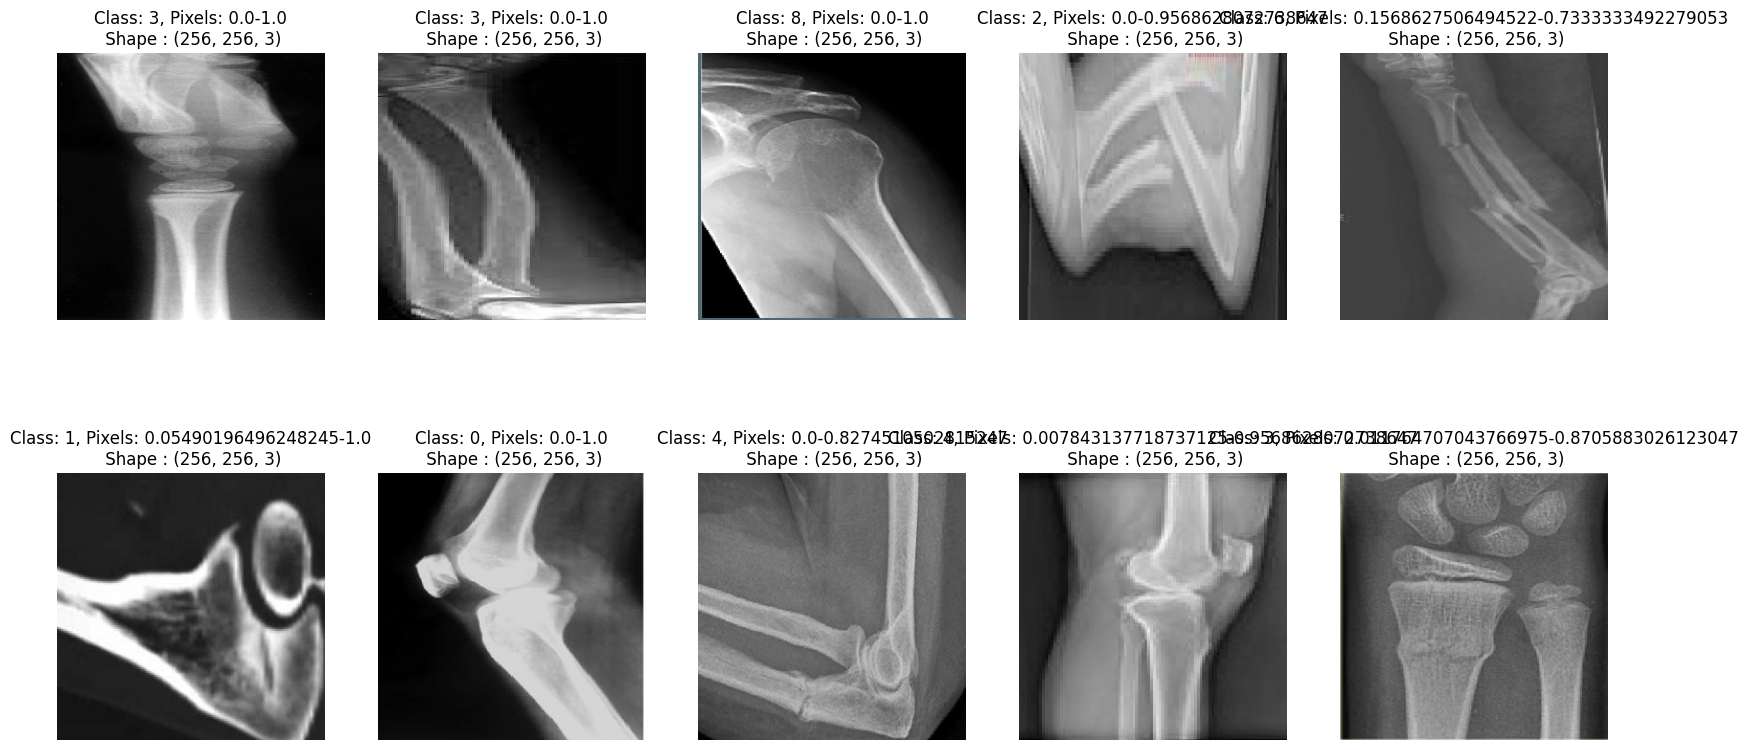

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot images
def plot_images(generator, num_images=10):
    images, labels = next(generator)
    plt.figure(figsize=(20, 10))
    
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {np.argmax(labels[i])}, Pixels: {images[i].min()}-{images[i].max()}\n Shape : {images[i].shape}")
        plt.axis('off')
    
    plt.show()

# Plot random images from the training data
plot_images(train_generator, num_images=10)

### Step 3: Pre-Process Images - ( Normalization if required can add this in first layer operation)


* it's handled by the rescale=1./255 parameter in the ImageDataGenerator. If further preprocessing is needed, you can add layers directly to your CNN architecture.

### Step 4: Create CNN Architecture



In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define a simple CNN model
model = Sequential([
    Input(shape=(256, 256, 3)),  # Explicitly define the input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,266 (56.61 MB)

 Trainable params: 14,840,266 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

### Step 5: Start Training and Show training graph

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 79s 773ms/step - accuracy: 0.1104 - loss: 3.0199 - val_accuracy: 0.1143 - val_loss: 2.2983
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 79s 754ms/step - accuracy: 0.1571 - loss: 2.2728 - val_accuracy: 0.1643 - val_loss: 2.2816
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 75s 752ms/step - accuracy: 0.2274 - loss: 2.1175 - val_accuracy: 0.2357 - val_loss: 2.2606
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 76s 768ms/step - accuracy: 0.3830 - loss: 1.7251 - val_accuracy: 0.2286 - val_loss: 2.2419
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 82s 768ms/step - accuracy: 0.5490 - loss: 1.4274 - val_accuracy: 0.2571 - val_loss: 2.9458


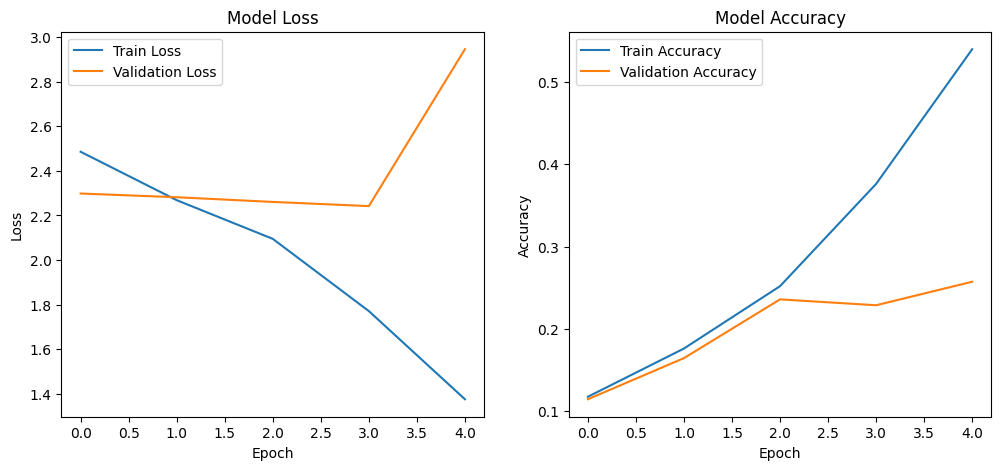

In [9]:
import matplotlib.pyplot as plt

# Ensure generators are reset before training
validation_generator.reset()
train_generator.reset()

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    verbose=1
)

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Trying a smaller Architecture

In [10]:
from tensorflow.keras.optimizers import Adam

# Define a simple CNN model
model2 = Sequential([
    Input(shape=(256, 256, 3)),  # Explicitly define the input shape here
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(40, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │    19,681,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,757,378 (75.37 MB)

 Trainable params: 19,757,378 (75.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.1155 - loss: 3.0436 - val_accuracy: 0.1214 - val_loss: 2.2966
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.2146 - loss: 2.2688 - val_accuracy: 0.1571 - val_loss: 2.3086
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.4369 - loss: 1.7224 - val_accuracy: 0.2071 - val_loss: 2.4849
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7144 - loss: 0.9945 - val_accuracy: 0.3000 - val_loss: 3.2989
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.8978 - loss: 0.4724 - val_accuracy: 0.2429 - val_loss: 3.7495


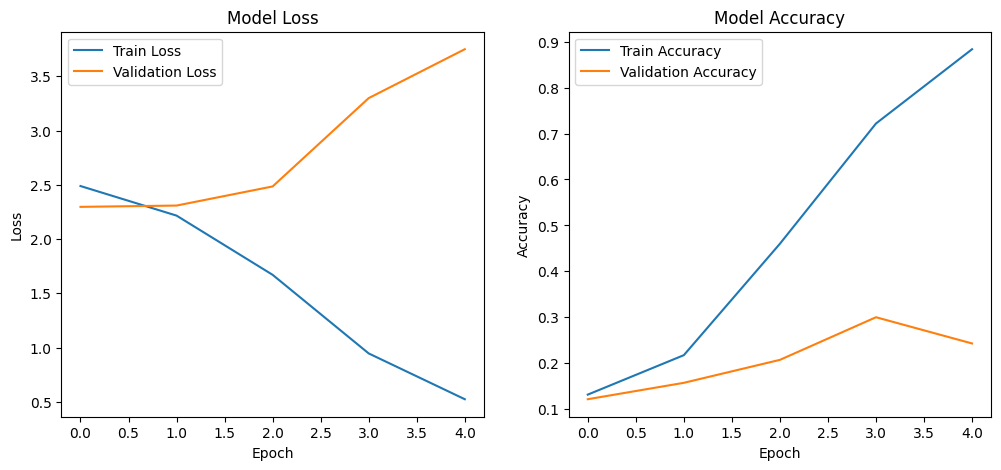

In [11]:
import matplotlib.pyplot as plt

# Ensure generators are reset before training
validation_generator.reset()
train_generator.reset()

# Train the model
history = model2.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    verbose=1
)

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Step 6: Prediction Results

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step
Accuracy: 0.11


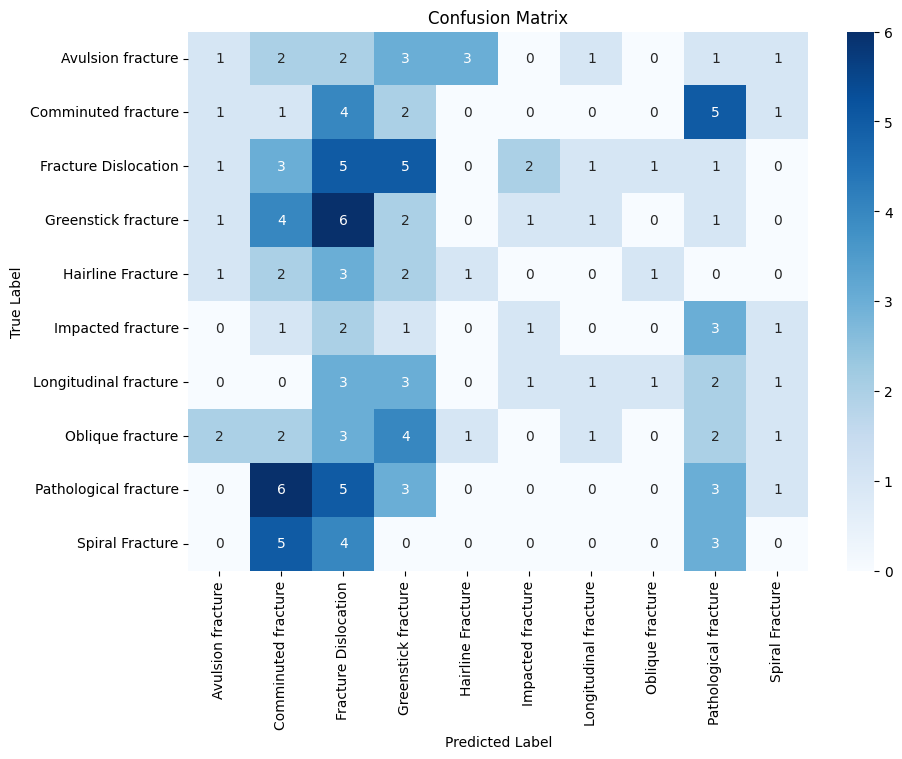

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the validation set
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_labels = validation_generator.classes

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_classes)
print(f'Accuracy: {accuracy:.2f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()